In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

In [2]:
nyears = 150

In [3]:
ism   = ['CISM_NCA','FETI_ULB','GRIS_LSC','IMAU_UU','ISSM_UCI','MALI_DOE','PISM_DMI','PISM_PIK','SICO_ILTS']
basin = ['East Ant.','Ross','Amundsen','Weddell','Peninsula']
rftime = np.arange(nyears)

ism_i = ['CISM_NCA','FETISH_ULB','GRIS_LSC','IMAU_VUB','ISSM_UCI','MALI_DOE','PISM_DMI','PISM_PIK','SICO_ILTS']
ism_s = ['CISM_NCA','FETI_VUB','GRIS_LSC','IMAU_VUB','ISSM_UCI','MALI_LAN','PISM_DMI','PISM_PIK','SICO_UHO']
region = ['R1','R2','R3','R4','R5']

In [4]:
irf  = np.zeros((len(rftime),len(ism),len(basin)))
srf  = np.zeros((len(rftime),len(ism),len(basin)))

In [5]:
#Read IRF
for i,ii in enumerate(ism_i):
    for r,reg in enumerate(region):
        with open(f'../data/Larmip/RFunctions_total/RF_{ii}_BM08_{reg}.dat') as f:
            irf[:,i,r] = np.array([float(x) for x in f.readlines()])[:nyears]

#Read SRF
for i,ii in enumerate(ism_s):
    for r,reg in enumerate(region):
        with open(f'../data/Larmip/RFunctions/RF_{ii}_BM08_{reg}.dat') as f:
            srf[:,i,r] = np.array([float(x) for x in f.readlines()])[:nyears]

FileNotFoundError: [Errno 2] No such file or directory: '../data/Larmip/RFunctions_total/RF_CISM_NCA_BM08_R1.dat'

In [ ]:
irf2  = xr.DataArray(irf,dims=('rftime','ism','basin'),coords={'rftime':rftime,'ism':ism,'basin':basin},attrs={'unit':'Gt/yr per m/yr','long_name':'ice mass loss response function to increased basal melt'})
srf2  = xr.DataArray(srf,dims=('rftime','ism','basin'),coords={'rftime':rftime,'ism':ism,'basin':basin},attrs={'unit':'m/yr per m/yr','long_name':'sea level response function to increased basal melt'})

ds = xr.Dataset({'irf':irf2,'srf':srf2})
ds.to_netcdf(f'../data/larmip.nc',mode='w')
ds

In [ ]:
fig,ax = plt.subplots(len(basin),len(ism),sharex=True,sharey='row',figsize=(10,10))

for i,im in enumerate(ism):
    ax[0,i].set_title(im)
    for b,bas in enumerate(basin):
        ax[b,i].plot(rftime,irf[:,i,b],c=ut.bcol[bas],label=bas)

fig.supylabel('IRF [Gt/yr per m/yr]')
plt.show()

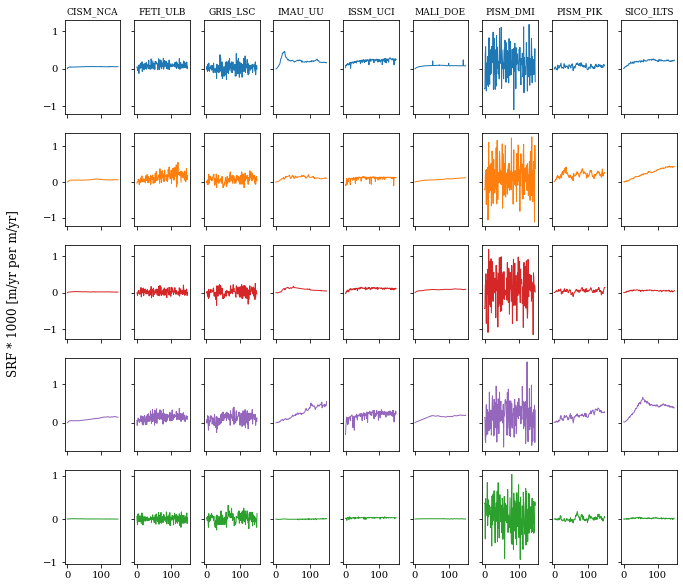

In [8]:
fig,ax = plt.subplots(len(basin),len(ism),sharex=True,sharey='row',figsize=(10,10))

for i,im in enumerate(ism):
    ax[0,i].set_title(im)
    for b,bas in enumerate(basin):
        ax[b,i].plot(rftime,1000*srf[:,i,b],c=ut.bcol[bas],label=bas)

fig.supylabel('SRF * 1000 [m/yr per m/yr]')
plt.show()
